In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai') 
import gdal
import numpy as np
import re
import os, io, re

# import image
train_path = './train_crowns/train_crowns/'
test_path = "./test_crowns/"
# filename を全て入れる
train_files = []
test_files = []
for filename in os.listdir(train_path):
    if os.path.isfile(os.path.join(train_path, filename)):
        train_files.append(filename)
for filename in os.listdir(test_path):
    if os.path.isfile(os.path.join(test_path, filename)):
        test_files.append(filename)

# .tifのファイルを選んで入れる
train_img = []
test_img= []
for name in train_files:
    if re.search(r"(.tif)$", name):
        train_img.append(name)
for name in test_files:
    if re.search(r"(.tif)$", name):
        test_img.append(name)
# print(img_files)

In [2]:
train_height = []
train_DBH = []
train_index = []
test_height = []
test_index = []
train_area = []
test_area = []

for imgfile in train_files:
    image = gdal.Open("C:/Users/owner/Kaggle/GE_Kaggle01/train_crowns/train_crowns/"+imgfile, gdal.GA_ReadOnly)
    a = np.array([image.GetRasterBand(i + 1).ReadAsArray() for i in range(image.RasterCount)])
    train_height.append(a[0<a].mean())
    train_area.append((a[0<a].sum()/a[0<a].mean()).round())
#     print(train_area)
#     print(a[a>0].mean())
    file = os.path.splitext(imgfile)[0]
    file_split = [i for i in file.split("_")]
    train_index.append(file_split[0])
    train_DBH.append(float(file_split[3]))
#     print(float(file_split[3]))
    
for imgfile in test_files:
    image = gdal.Open("C:/Users/owner/Kaggle/GE_Kaggle01/test_crowns/"+imgfile, gdal.GA_ReadOnly)
    a = np.array([image.GetRasterBand(i + 1).ReadAsArray() for i in range(image.RasterCount)])
    test_height.append(a[a>0].mean())
    test_area.append((a[0<a].sum()/a[0<a].mean()).round())
#     print(test_area)
#     print(a[a>0].mean())
    file = os.path.basename(imgfile)
    file_split = [i for i in file.split("_")]
    test_index.append(file_split[0])
#     print(file_split[0])

In [24]:
import pandas as pd
index = pd.Index(train_index)
d = {"Height": train_height}
train = pd.DataFrame(data=d, index=index)
# print(train)
target = pd.DataFrame({"DBH": train_DBH}, index=index)
# print(target)
test = pd.DataFrame(data={"Height": test_height}, index=pd.Index(test_index))

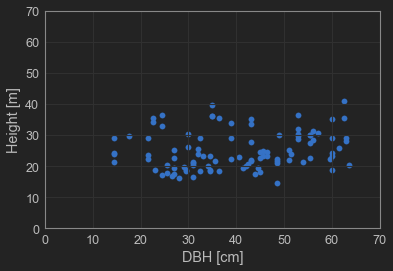

In [25]:
data = pd.DataFrame({"Height": train_height, "DBH": train_DBH}, index=index)
# print(tmp)
import matplotlib.pyplot as plt
fig = plt.figure()

import matplotlib.pyplot as plt
x = data["DBH"]
y = data["Height"]
plt.scatter(x,y)
plt.xlabel("DBH [cm]")
plt.ylabel("Height [m]")
plt.axis([0,70,0,70])
plt.show()

In [26]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
loo = LeaveOneOut()
prediction = []
X = train["Height"]
Y = target["DBH"]

In [ ]:
# for X_index, Y_index in loo.split(train):
#     X_train, X_target = np.log(X[X_index]), np.log(Y[X_index])
#     Y_train, Y_target = np.log(X[Y_index]), np.log(Y[Y_index])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, Y_train = train_test_split(X)
xtr,xvl = X[X_train], X.loc[Y_train]
    
#     dtrain = pd.DataFrame(X_train, index=X_target)
#     dvalid = pd.DataFrame(Y_train, index=Y_target)
print(X_train, type(Y_target))

IndexError: arrays used as indices must be of integer (or boolean) type

In [8]:
plt.figure(figsize=(10, 5))
train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.ylim(0, 5)
plt.show()

NameError: name 'evals_result' is not defined

<Figure size 720x360 with 0 Axes>

In [82]:
from sklearn.metrics import mean_squared_error
pred = bst.predict(dvalid)

rmse = np.sqrt(mean_squared_error(Y_train, pred))
print(np.exp(rmse))

1.8776040354064394


In [88]:
ttest = ttest.drop(["Area"],axis=1)
ttest = ttest.rename(columns={"Height": 0})
dtest = xgb.DMatrix(np.log(ttest))
pred = pd.DataFrame()
pred["Id"] = test_index
ans = ((np.exp(bst.predict(dtest)))*2).round(0)/2
pred["DBH"] = ans
pred.to_csv("DBH_xgb_log_loo.csv", index=False)